In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score

In [3]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.drop(["Unnamed: 0", "key"], axis=1, inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [9]:
df['hour'] = df["pickup_datetime"].apply(lambda x: x.hour)

In [10]:
df['day'] = df["pickup_datetime"].apply(lambda x: x.day)
df['month'] = df["pickup_datetime"].apply(lambda x: x.month)
df['year'] = df["pickup_datetime"].apply(lambda x: x.year)
df['weekday'] = df["pickup_datetime"].apply(lambda x: calendar.day_name[x.weekday()])
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,Thursday
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,Friday
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,Monday
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,Friday
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,Thursday


In [12]:
df.drop(["pickup_datetime"], axis = 1, inplace = True)

In [13]:
df.weekday = df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,4
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,5
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,5
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,4


In [14]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
hour                 0
day                  0
month                0
year                 0
weekday              0
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
weekday              0
dtype: int64

# Outliers

<AxesSubplot:xlabel='fare_amount'>

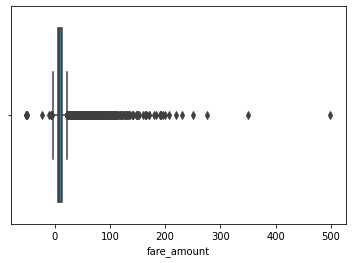

In [17]:
sns.boxplot(x = 'fare_amount', data = df)

In [18]:
Q1 = np.percentile(df['fare_amount'],25)#interpolation = 'midpoint'
Q3 = np.percentile(df['fare_amount'],75)
IQR = Q3 - Q1

In [19]:
upper = Q3 + IQR*1.5
lower = Q1 - IQR*1.5
print(upper)
print(lower)

22.25
-3.75


In [20]:
print(df.shape)
df = df[(df['fare_amount']<=upper) & (df['fare_amount']>=lower)]
print(df.shape)

(199999, 11)
(182833, 11)


<AxesSubplot:xlabel='fare_amount'>

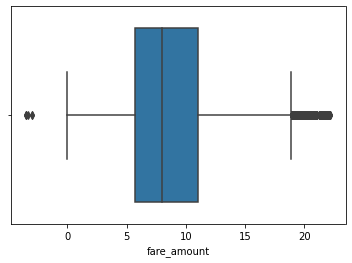

In [21]:
sns.boxplot(x = 'fare_amount', data = df)

# Correlation

In [23]:
df_corr = df.corr()
df_corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
fare_amount,1.000000,0.000367,0.002618,-0.002413,0.000589,0.012618,-0.013219,0.006860,0.026338,0.135172,0.020539
pickup_longitude,0.000367,1.000000,-0.812047,0.835950,-0.850574,-0.000751,0.003544,0.003144,-0.003949,0.009779,-0.002404
pickup_latitude,0.002618,-0.812047,1.000000,-0.767103,0.684558,-0.001604,-0.004675,-0.006687,0.004153,-0.009827,0.000452
dropoff_longitude,-0.002413,0.835950,-0.767103,1.000000,-0.913949,0.000203,0.004026,0.003734,-0.003472,0.007415,-0.002211
dropoff_latitude,0.000589,-0.850574,0.684558,-0.913949,1.000000,-0.000853,-0.003166,-0.006007,0.003509,-0.010038,0.000017
passenger_count,0.012618,-0.000751,-0.001604,0.000203,-0.000853,1.000000,0.013435,0.003472,0.009607,0.002383,0.007635
hour,-0.013219,0.003544,-0.004675,0.004026,-0.003166,0.013435,1.000000,0.005106,-0.002705,0.003119,0.033220
day,0.006860,0.003144,-0.006687,0.003734,-0.006007,0.003472,0.005106,1.000000,-0.016254,-0.010556,0.008420
month,0.026338,-0.003949,0.004153,-0.003472,0.003509,0.009607,-0.002705,-0.016254,1.000000,-0.115996,-0.004382
year,0.135172,0.009779,-0.009827,0.007415,-0.010038,0.002383,0.003119,-0.010556,-0.115996,1.000000,-0.003460


<AxesSubplot:>

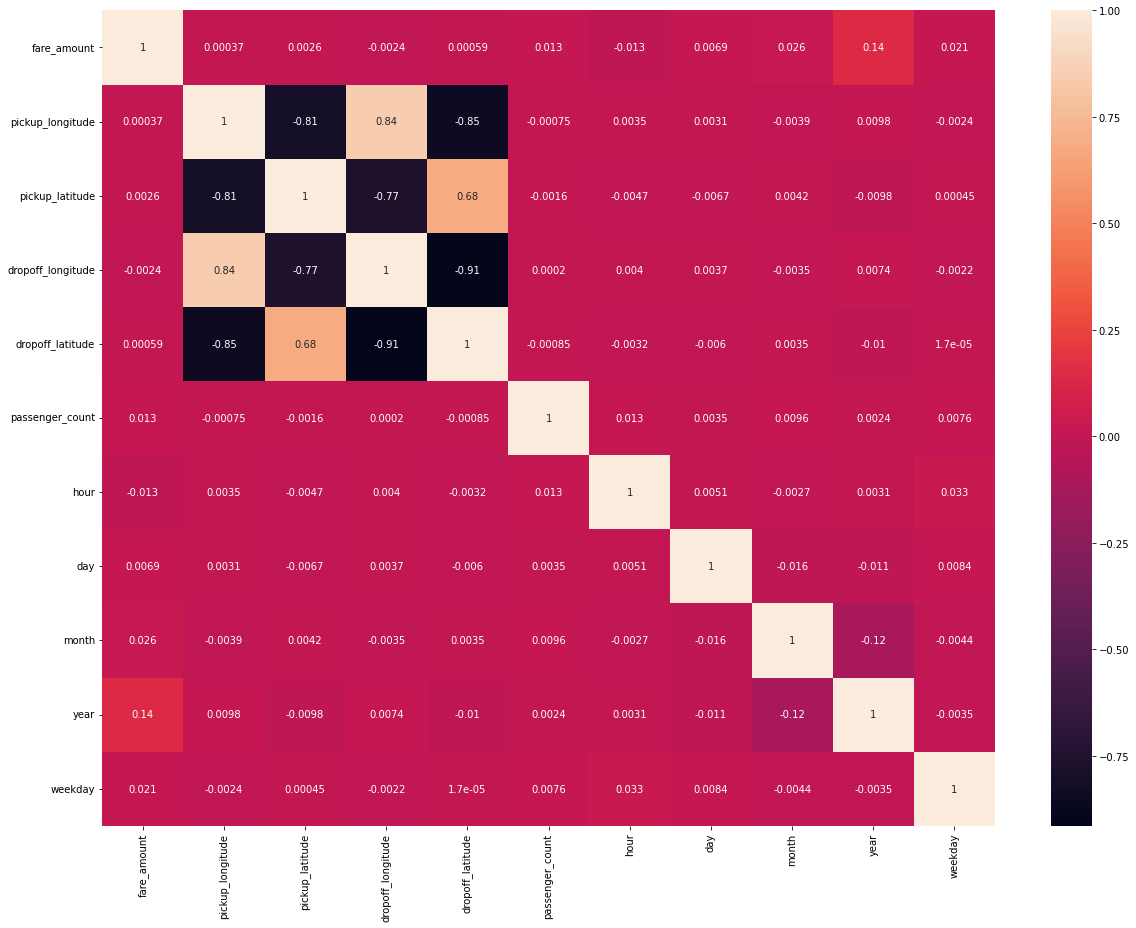

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True)

# Linear Regression

In [27]:
x = df.drop(["fare_amount"], axis=1)
y = df["fare_amount"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
ss = preprocessing.StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [30]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [31]:
lrmodel = LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred = lrmodel.predict(x_test)

In [33]:
print("Regression_coefficients: ", lrmodel.coef_)
print("Intercept: ", lrmodel.intercept_)

Regression_coefficients:  [ 0.03528134  0.03250371 -0.01159216  0.00079703  0.05093528 -0.0609932
  0.03530132  0.18245081  0.5809814   0.08721031]
Intercept:  8.938168815719273


In [35]:
print('MSE: ',mean_squared_error(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2: ',r2_score(y_test,y_pred))

MSE:  16.790917056285853
MAE:  3.2470717966665137
RMSE:  4.09767215090298
R2:  0.02086595047130657


# RFR

In [38]:
rfrmodel = RandomForestRegressor(n_estimators=10,random_state=1)

In [39]:
rfrmodel.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [40]:
pred = rfrmodel.predict(x_test)


In [41]:
print('MSE: ',mean_squared_error(y_test,pred))
print('MAE: ',mean_absolute_error(y_test,pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2: ',r2_score(y_test,pred))

MSE:  4.676411728032186
MAE:  1.4896611900920294
RMSE:  2.1625012665966663
R2:  0.7273029259103214
